# TimeSeries - Classical
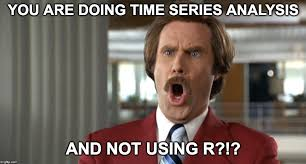

# Setup

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import HoltWintersResults

from pylab import rcParams
rcParams['figure.figsize'] = 12,6

# Temperature

In [201]:
tempDF = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv',
                         infer_datetime_format=True,
                         parse_dates=True,
                         index_col='Date')
tempDF.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Text(0.5, 1.0, 'Sydney Temperature Activity')

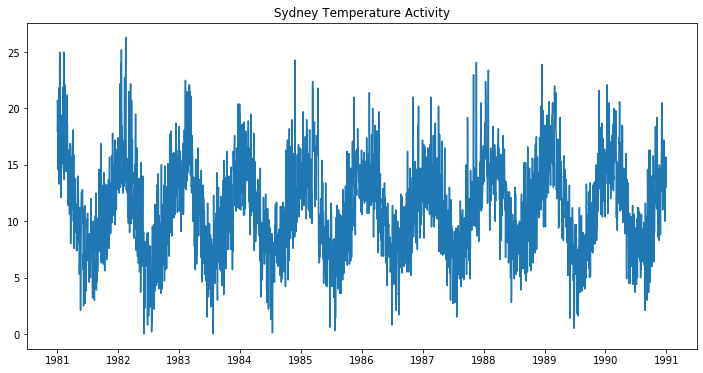

In [202]:
plt.figure(figsize=(12,6))
plt.plot(tempDF)
plt.title('Sydney Temperature Activity')

# Pandas Support

## DateTimeIndex
* Specialized Index for Pandas DataFrames
* Supports time series functions
* Supports date slicing

In [203]:
tempDF.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [204]:
tempDF.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

## Missing

In [205]:
tempDF.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [206]:
tempDF[tempDF.Temp.isna()]

,Temp
Date,


## Frequency
* Frequency refers to the periodicity of the data
* Can't set a frequency on data missing in the index (a day or month not there)
* Can handle NaN values for a given measurement
* Here we don't have 1984-12-31
* But with a frequency, we gained the missing rows

In [207]:
tempDF['1984-12-30':'1985-01-02']

,Temp
Date,
1984-12-30,16.4
1985-01-01,13.3
1985-01-02,15.2


In [208]:
tempDF = tempDF.asfreq('D')

In [209]:
tempDF.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3652, freq='D')

In [210]:
tempDF['1984-12-30':'1985-01-02']

,Temp
Date,
1984-12-30,16.4
1984-12-31,NaN
1985-01-01,13.3
1985-01-02,15.2


## Impute
* Traditional impute strategy like mean or median
* Backfill (take future value and back fill it over the missing value)
* Forward fill (take next value)
* Be careful of leaking if back

In [211]:
tempDF = tempDF.fillna(method='bfill')

In [212]:
tempDF['1984-12-30':'1985-01-02']

,Temp
Date,
1984-12-30,16.4
1984-12-31,13.3
1985-01-01,13.3
1985-01-02,15.2


## Slicing

Text(0.5, 1.0, 'Sydney Temperature Activity - 1981')

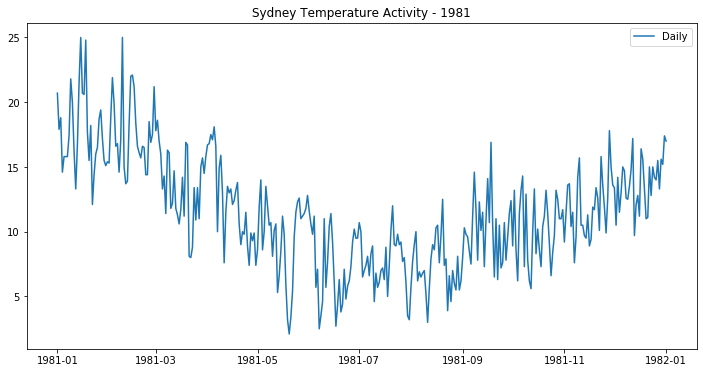

In [213]:
plt.figure(figsize=(12,6))
plt.plot(tempDF['1981-01-01':'1982-01-01'], label='Daily')
plt.legend()
plt.title('Sydney Temperature Activity - 1981')

## Shift

In [214]:
shiftDF = tempDF.copy()
shiftDF['Last'] = shiftDF.shift(1)
shiftDF['Diff'] = shiftDF.Last - shiftDF.Temp
shiftDF.head()

,Temp,Last,Diff
Date,,,
1981-01-01,20.7,NaN,NaN
1981-01-02,17.9,20.7,2.8
1981-01-03,18.8,17.9,-0.9
1981-01-04,14.6,18.8,4.2
1981-01-05,15.8,14.6,-1.2


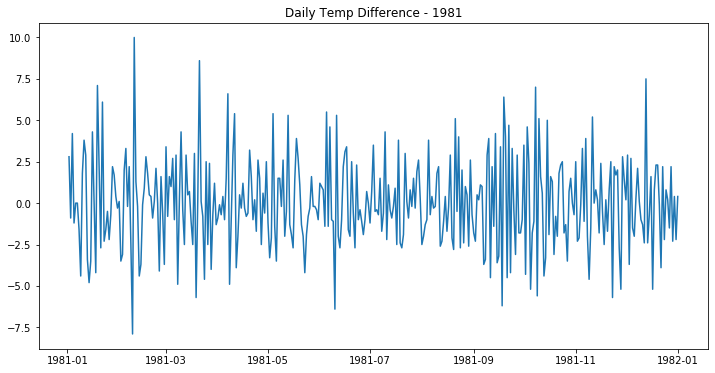

In [215]:
plt.plot(shiftDF.Diff['1981-01-01':'1982-01-01'])
plt.title('Daily Temp Difference - 1981');

## Resample
* Similar to group by but very time series friendly
* Set the rule for the grouping
* Apply an aggregate function to set the value for the grouping

In [216]:
avgTempDF = tempDF.resample(rule='30D').mean()
avgTempDF.head()

,Temp
Date,
1981-01-01,17.790000
1981-01-31,17.606667
1981-03-02,13.356667
1981-04-01,12.356667
1981-05-01,9.380000


Text(0.5, 1.0, 'Sydney Temperature Activity')

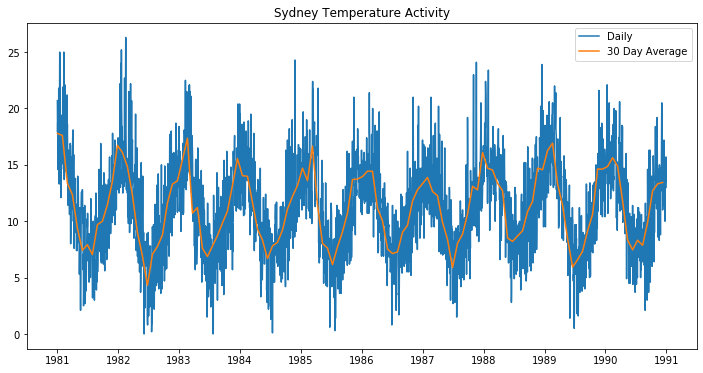

In [217]:
plt.figure(figsize=(12,6))
plt.plot(tempDF, label='Daily')
plt.plot(avgTempDF, label='30 Day Average')
plt.legend()
plt.title('Sydney Temperature Activity')

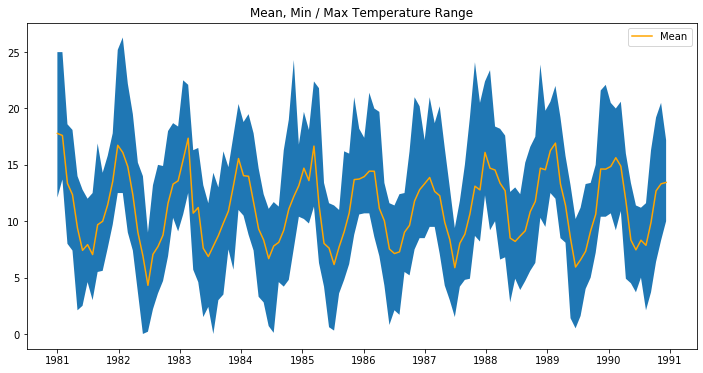

In [218]:
resampleTempDF = tempDF.resample(rule='30D').agg(['mean','min','max'])
plt.figure(figsize=(12,6))
plt.fill_between(resampleTempDF.index, resampleTempDF[('Temp','min')], resampleTempDF[('Temp','max')])
plt.plot(resampleTempDF[('Temp', 'mean')], color='orange', label='Mean')
plt.legend()
plt.title('Mean, Min / Max Temperature Range');

## Rolling
* Take an offsetting n number of points into a grouping
* Can apply arbitrary aggregates to the groupings
* By default there will be n-1 points that are not populated
* Can control the minimum number of points
* Appropriate when a subset of recent points are representative

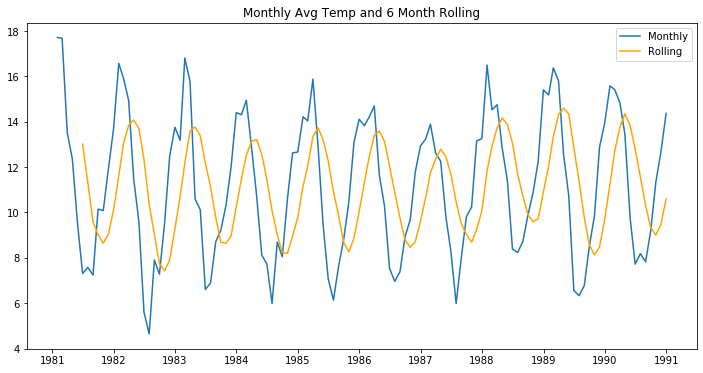

In [219]:
plt.figure(figsize=(12,6))
plotTempDF = tempDF.resample(rule='M').mean()
plotTempDF['Rolling'] = plotTempDF.rolling(6).mean()
plt.plot(plotTempDF.Temp, label='Monthly')
plt.plot(plotTempDF.Rolling, color='orange', label='Rolling')
plt.legend()
plt.title('Monthly Avg Temp and 6 Month Rolling');

## Expanding
* Take in n points
* Compute the aggregate over the selection
* Add the next point, and recompute
* Appropriate when the entire data set would be good to use

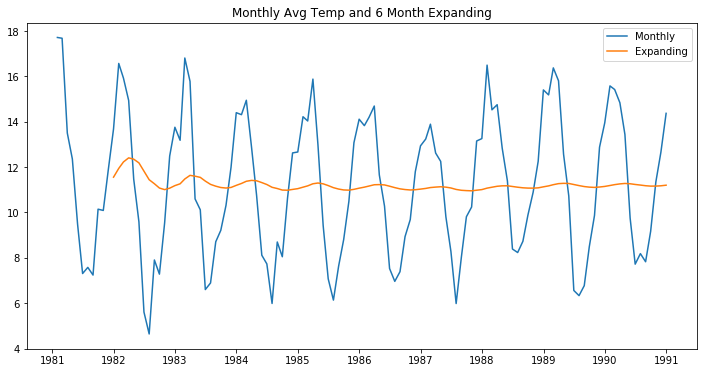

In [220]:
plotTempDF = tempDF.resample(rule='M').mean()
plotTempDF['Expanding'] = plotTempDF['Temp'].expanding(12).mean()

plt.figure(figsize=(12,6))
plt.plot(plotTempDF.Temp, label='Monthly')
plt.plot(plotTempDF.Expanding, label='Expanding')
plt.legend()
plt.title('Monthly Avg Temp and 6 Month Expanding');

# Air Passengers

In [221]:
!kaggle datasets download -d rakannimer/air-passengers -p ./air-passengers
!unzip -o ./air-passengers/air-passengers.zip -d ./air-passengers

air-passengers.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./air-passengers/air-passengers.zip
  inflating: ./air-passengers/AirPassengers.csv  


In [222]:
passengersDF = pd.read_csv('./air-passengers/airpassengers.csv',
                           infer_datetime_format=True,
                           parse_dates=True,
                           index_col='Month')
passengersDF.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


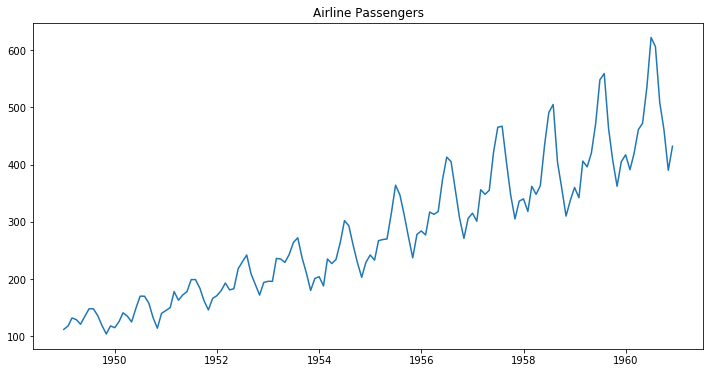

In [223]:
plt.figure(figsize=(12,6))
plt.plot(passengersDF)
plt.title('Airline Passengers');

# Decomposition
* Recall Hodrick Prescott Filter
    * Series Input
    * Trend Component
    * Cyclical Component (Everythng that isn't trend)
* Seasonal Decomposition
    * Series Input
    * Trend Component
    * Seasonal Component
    * Residual (Not trend or seasonal)
* Can handle two types of trend
    * Additive
    * Multiplicative

## Additive Model

In [224]:
additive = seasonal_decompose(passengersDF, model='additive')

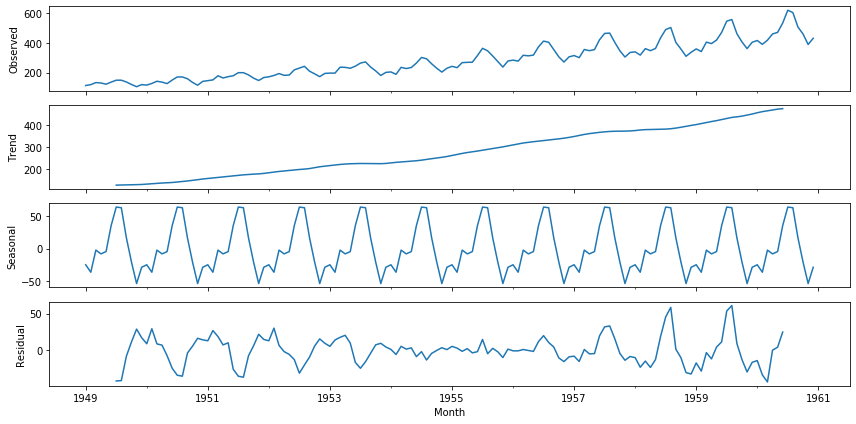

In [225]:
additive.plot();

## Multiplicative Model

In [226]:
mult = seasonal_decompose(passengersDF, model='multiplicative')

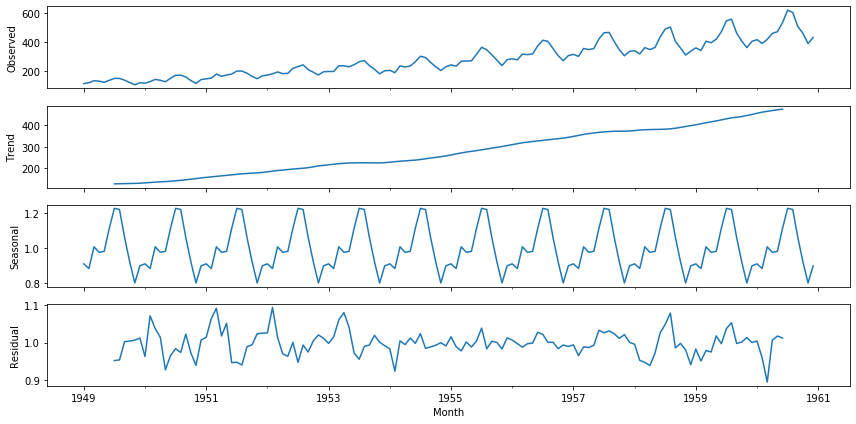

In [227]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6
mult.plot();

## Residual Comparison

Text(0.5, 1.0, 'Residual - Additive vs Multiplicative')

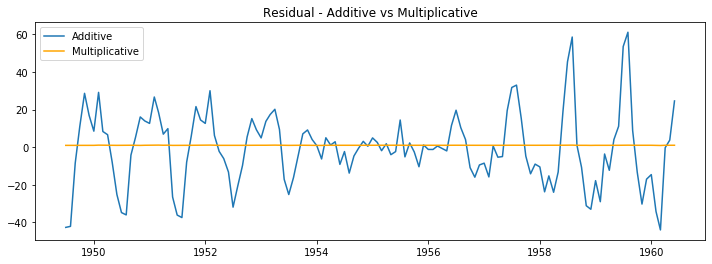

In [228]:
plt.figure(figsize=(12,4))
plt.plot(additive.resid, label='Additive')
plt.plot(mult.resid, label='Multiplicative', color='orange')
plt.legend()
plt.title('Residual - Additive vs Multiplicative')

## Trend Comparison
* Trend under both is the same

Text(0.5, 1.0, 'Trend - Additive vs Multiplicative')

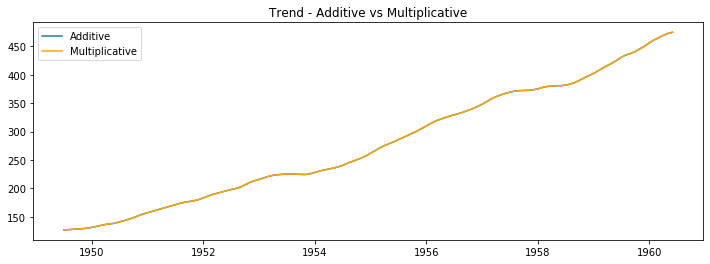

In [229]:
plt.figure(figsize=(12,4))
plt.plot(additive.trend, label='Additive')
plt.plot(mult.trend, label='Multiplicative', color='orange')
plt.legend()
plt.title('Trend - Additive vs Multiplicative')

## Seasonal Comparison
* Seasonal fluctuation is increasing over time
* Additive model generates a large amount of residual to compensate
* Multiplicative model handles seasonality much easier

Text(0.5, 1.0, 'Seasonal - Additive vs Multiplicative')

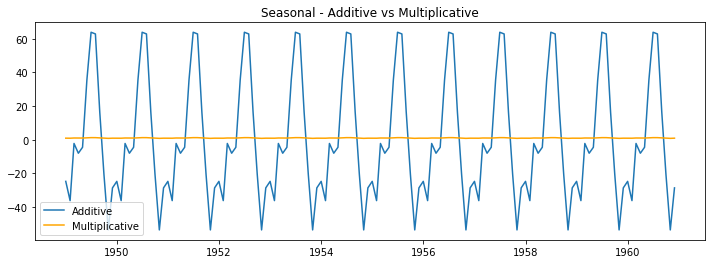

In [230]:
plt.figure(figsize=(12,4))
plt.plot(additive.seasonal, label='Additive')
plt.plot(mult.seasonal, label='Multiplicative', color='orange')
plt.legend()
plt.title('Seasonal - Additive vs Multiplicative')

# Sunspots

In [231]:
sunspotsDF = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv',
                         infer_datetime_format=True,
                         parse_dates=True,
                         index_col='Month')
sunspotsDF.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


In [232]:
sunspotsDF.index

DatetimeIndex(['1749-01-01', '1749-02-01', '1749-03-01', '1749-04-01',
               '1749-05-01', '1749-06-01', '1749-07-01', '1749-08-01',
               '1749-09-01', '1749-10-01',
               ...
               '1983-03-01', '1983-04-01', '1983-05-01', '1983-06-01',
               '1983-07-01', '1983-08-01', '1983-09-01', '1983-10-01',
               '1983-11-01', '1983-12-01'],
              dtype='datetime64[ns]', name='Month', length=2820, freq=None)

In [158]:
sunspotsDF

DatetimeIndexResampler [freq=<MonthBegin>, axis=0, closed=left, label=left, convention=start, base=0]

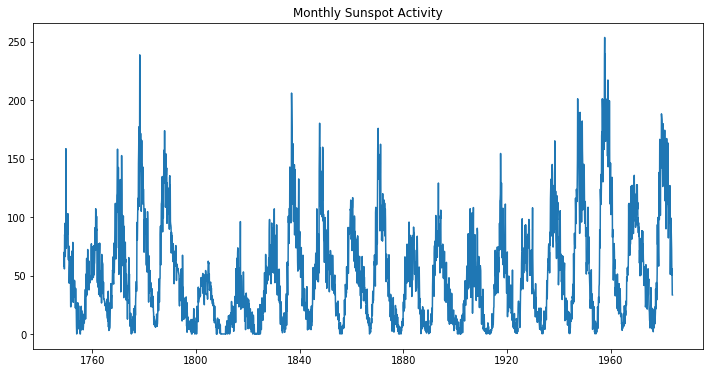

In [233]:
plt.figure(figsize=(12,6))
plt.plot(sunspotsDF)
plt.title('Monthly Sunspot Activity');

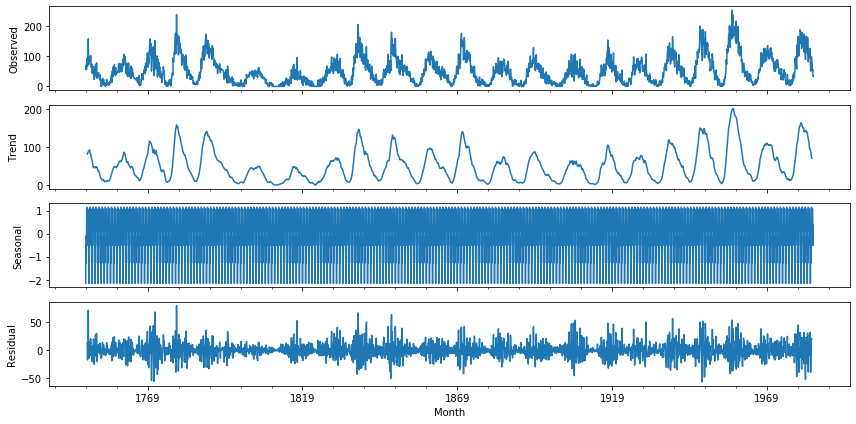

In [234]:
sunspotsDecomp = seasonal_decompose(sunspotsDF, model='additive')
sunspotsDecomp.plot();

# Averaging

## Simple Moving Average (SMA)

In [235]:
sma12     = sunspotsDF.rolling(12).mean()
sma11Year = sunspotsDF.rolling(11 * 12).mean()

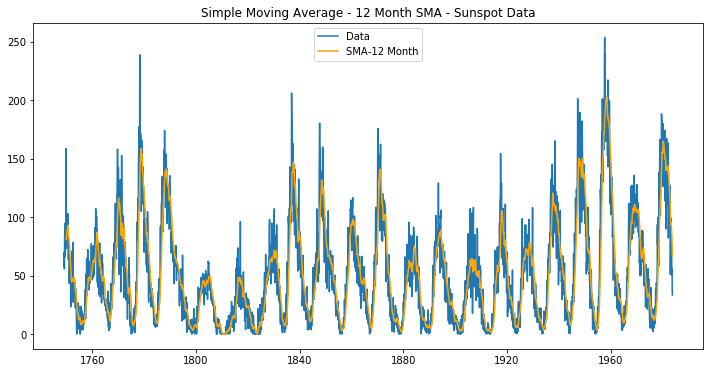

In [236]:
plt.plot(sunspotsDF, label='Data')
plt.plot(sma12, color='orange', label='SMA-12 Month')
plt.legend()
plt.title('Simple Moving Average - 12 Month SMA - Sunspot Data');

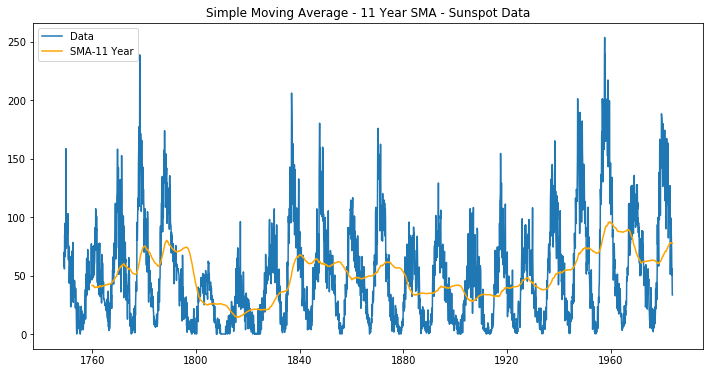

In [237]:
plt.plot(sunspotsDF, label='Data')
plt.plot(sma11Year, color='orange', label='SMA-11 Year')
plt.legend()
plt.title('Simple Moving Average - 11 Year SMA - Sunspot Data');

## Exponentially Weighted Moving Average (EWMA)

In [238]:
ewma = sunspotsDF.ewm(span=12).mean()

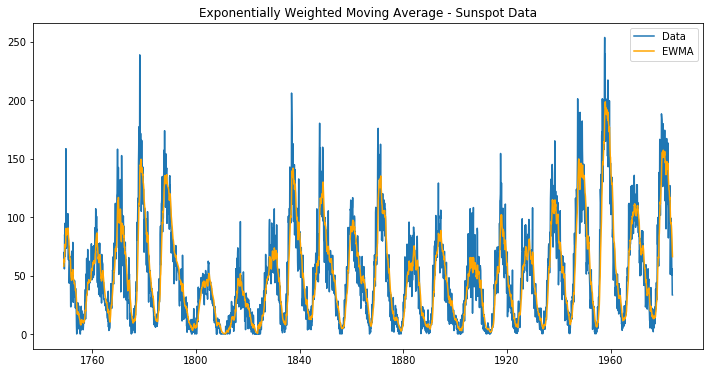

In [239]:
plt.plot(sunspotsDF, label='Data')
plt.plot(ewma, color='orange', label='EWMA')
plt.legend()
plt.title('Exponentially Weighted Moving Average - Sunspot Data');

# Metrics

In [240]:
resultsDF = pd.DataFrame(columns=['SSE', 'AIC', 'BIC'])

# Simple Exponential Smoothing
$
\begin{align}
\alpha * y_t + (1-\alpha) * y_{t-1}
\end{align}
$
* Assigns exponentially decreasing weights to past observations
* Restricted version of Exponential Smoothing
* Implemented in the SimpleExpSmoothing as subclass of ExponentialSmoothing
* Good choice when:
    * No clear trend 
    * No seasonal pattern
* Forecasted values are generated from weighted averages
* Weights controled by smoothing parameter
    * alpha (Range 0 .. 1)
    * alpha close to 1 assigns weight to recent observations
    * alpha close to 0 assigns weight to average historical data

## Naive Model
* When alpha is set to 1 we forecast the last value
* From far away, the plot looks good
* When we zoom in on the plot, we can see that we are just one period offset
* Assumes past is a perfect future predictor

In [241]:
modelNaive = SimpleExpSmoothing(sunspotsDF).fit(smoothing_level=1.0, optimized=False)

/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [242]:
resultsDF.loc['Simple:Naive'] = [modelNaive.sse, modelNaive.aic, modelNaive.bic]
modelNaive.summary()

Dep. Variable:,endog,No. Observations:,2820
Model:,SimpleExpSmoothing,SSE,833168.720
Optimized:,False,AIC,16045.568
Trend:,None,BIC,16057.457
Seasonal:,None,AICC,16045.582
Seasonal Periods:,None,Date:,"Wed, 29 Jan 2020"
Box-Cox:,False,Time:,15:51:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
initial_level,58.000000,l.0,False


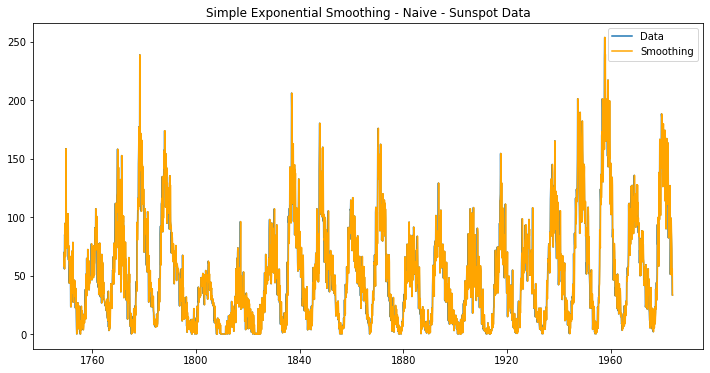

In [243]:
plt.plot(sunspotsDF, label='Data')
plt.plot(modelNaive.fittedvalues, color='orange', label='Smoothing')
plt.legend()
plt.title('Simple Exponential Smoothing - Naive - Sunspot Data');

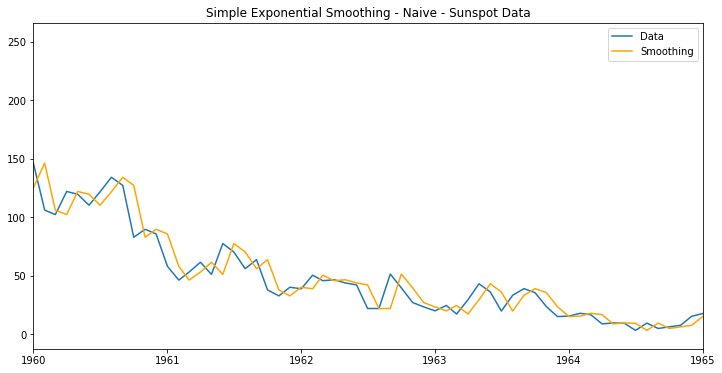

In [244]:
plt.plot(sunspotsDF, label='Data')
plt.plot(modelNaive.fittedvalues, color='orange', label='Smoothing')
plt.xlim('1960-01-01','1965-01-01')
plt.legend()
plt.title('Simple Exponential Smoothing - Naive - Sunspot Data');

## Historical Average

In [245]:
modelAverage = SimpleExpSmoothing(sunspotsDF).fit(smoothing_level=0.0, optimized=False)

In [246]:
resultsDF.loc['Simple:Average'] = [modelAverage.sse, modelAverage.aic, modelAverage.bic]
modelAverage.summary()

Dep. Variable:,endog,No. Observations:,2820
Model:,SimpleExpSmoothing,SSE,5449624.620
Optimized:,False,AIC,21341.714
Trend:,None,BIC,21353.603
Seasonal:,None,AICC,21341.728
Seasonal Periods:,None,Date:,"Wed, 29 Jan 2020"
Box-Cox:,False,Time:,15:51:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.000000,alpha,False
initial_level,58.000000,l.0,False


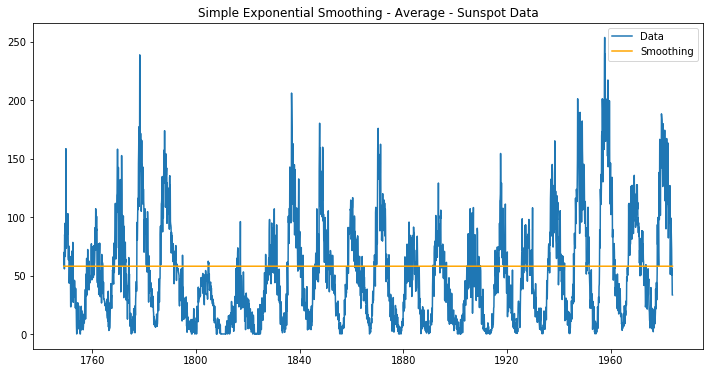

In [247]:
plt.plot(sunspotsDF, label='Data')
plt.plot(modelAverage.fittedvalues, color='orange', label='Smoothing')
plt.legend()
plt.title('Simple Exponential Smoothing - Average - Sunspot Data');

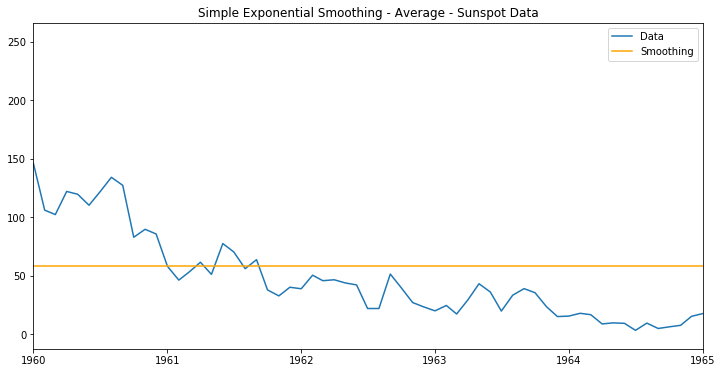

In [248]:
plt.plot(sunspotsDF, label='Data')
plt.plot(modelAverage.fittedvalues, color='orange', label='Smoothing')
plt.xlim('1960-01-01','1965-01-01')
plt.legend()
plt.title('Simple Exponential Smoothing - Average - Sunspot Data');

## EWMA
* By setting alpha correctly, we can achieve the same forecast produced by EWMA 

In [249]:
span = 12
alpha = 2 / (span + 1)
modelEWMA = SimpleExpSmoothing(sunspotsDF).fit(smoothing_level=alpha, optimized=False)

In [250]:
resultsDF.loc['Simple:EWMA'] = [modelEWMA.sse, modelEWMA.aic, modelEWMA.bic]
modelSES.summary()

Dep. Variable:,endog,No. Observations:,2820
Model:,SimpleExpSmoothing,SSE,1061996.685
Optimized:,False,AIC,16729.897
Trend:,None,BIC,16741.786
Seasonal:,None,AICC,16729.911
Seasonal Periods:,None,Date:,"Wed, 29 Jan 2020"
Box-Cox:,False,Time:,15:51:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1538462,alpha,False
initial_level,58.000000,l.0,False


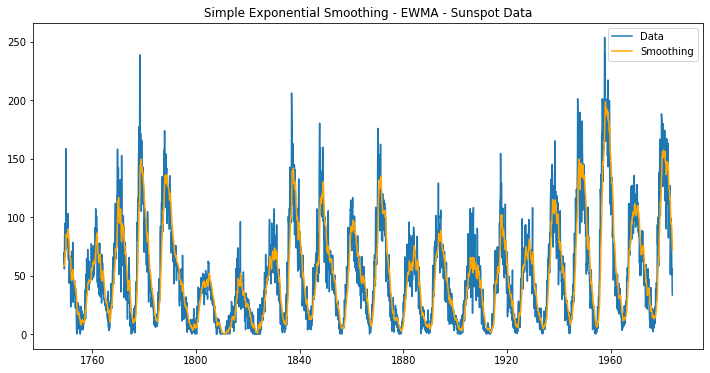

In [251]:
plt.plot(sunspotsDF, label='Data')
plt.plot(modelEWMA.fittedvalues, color='orange', label='Smoothing')
plt.legend()
plt.title('Simple Exponential Smoothing - EWMA - Sunspot Data');

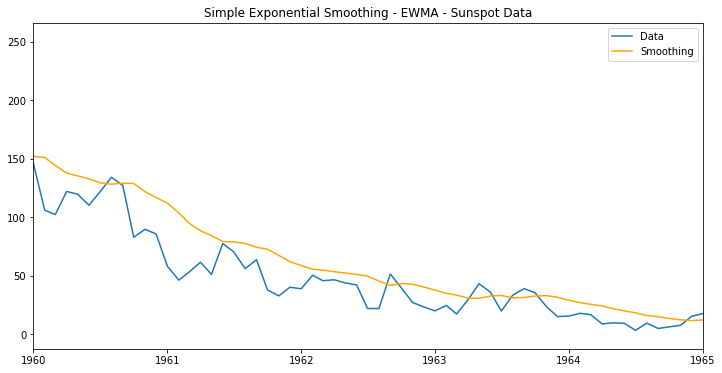

In [252]:
plt.plot(sunspotsDF, label='Data')
plt.plot(modelEWMA.fittedvalues, color='orange', label='Smoothing')
plt.xlim('1960-01-01','1965-01-01')
plt.legend()
plt.title('Simple Exponential Smoothing - EWMA - Sunspot Data');

## Auto Optimization
* We let the model find an alpha setting
* This finds a good balance - setting (recommend using it)

In [253]:
modelAuto = SimpleExpSmoothing(sunspotsDF).fit()

In [254]:
resultsDF.loc['Simple:Auto'] = [modelAuto.sse, modelAuto.aic, modelAuto.bic]
modelAuto.summary()

Dep. Variable:,endog,No. Observations:,2820
Model:,SimpleExpSmoothing,SSE,716119.661
Optimized:,True,AIC,15618.651
Trend:,None,BIC,15630.540
Seasonal:,None,AICC,15618.666
Seasonal Periods:,None,Date:,"Wed, 29 Jan 2020"
Box-Cox:,False,Time:,15:51:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5294219,alpha,True
initial_level,61.743087,l.0,True


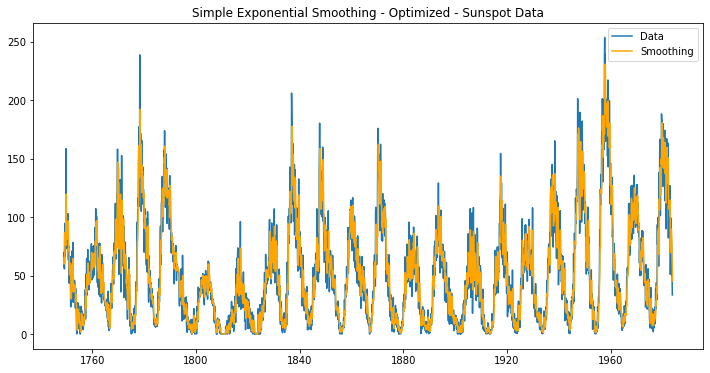

In [255]:
plt.plot(sunspotsDF, label='Data')
plt.plot(modelAuto.fittedvalues, color='orange', label='Smoothing')
plt.legend()
plt.title('Simple Exponential Smoothing - Optimized - Sunspot Data');

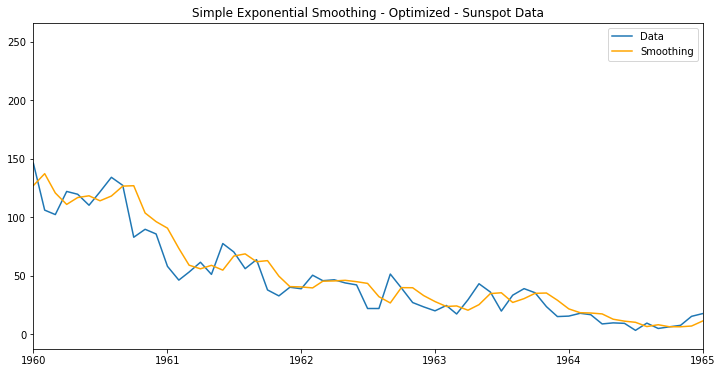

In [256]:
plt.plot(sunspotsDF, label='Data')
plt.plot(modelAuto.fittedvalues, color='orange', label='Smoothing')
plt.xlim('1960-01-01','1965-01-01')
plt.legend()
plt.title('Simple Exponential Smoothing - Optimized - Sunspot Data');

## Comparison

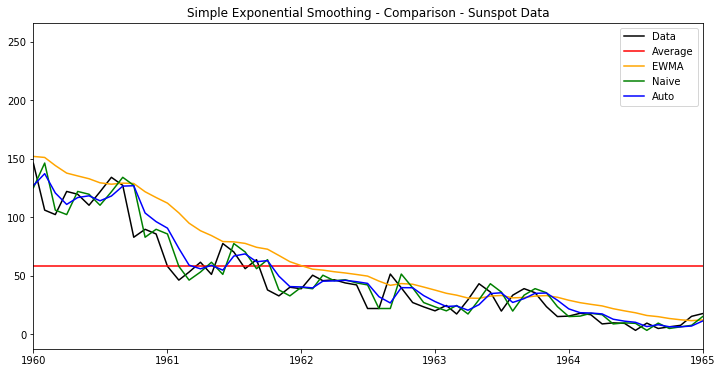

In [279]:
plt.plot(sunspotsDF, color='black', label='Data')
plt.plot(modelAverage.fittedvalues, color='red', label='Average')
plt.plot(modelEWMA.fittedvalues, color='orange', label='EWMA')
plt.plot(modelNaive.fittedvalues, color='green', label='Naive')
plt.plot(modelAuto.fittedvalues, color='blue', label='Auto')
plt.xlim('1960-01-01','1965-01-01')
plt.legend()
plt.title('Simple Exponential Smoothing - Comparison - Sunspot Data');

# Holt
* Builds on SimpleExpSmoothing
* Double Exponential Smoothing
* Uses two smoothing equations
    * Level
    * Trend
* Can handle additive and multiplicative trends

\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + hb_{t}\\
  \ell_{t} &= \alpha(y_{t}) + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1}\\
\end{align*}

In [281]:
holtAdd = Holt(sunspotsDF)
holtResults = holtAdd.fit()

/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [282]:
resultsDF.loc['Holt'] = [modelNaive.sse, modelNaive.aic, modelNaive.bic]
holtResults.summary()

Dep. Variable:,endog,No. Observations:,2820
Model:,Holt,SSE,716119.661
Optimized:,True,AIC,15622.651
Trend:,Additive,BIC,15646.429
Seasonal:,None,AICC,15622.681
Seasonal Periods:,None,Date:,"Fri, 31 Jan 2020"
Box-Cox:,False,Time:,06:49:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5294191,alpha,True
smoothing_slope,0.000000,beta,True


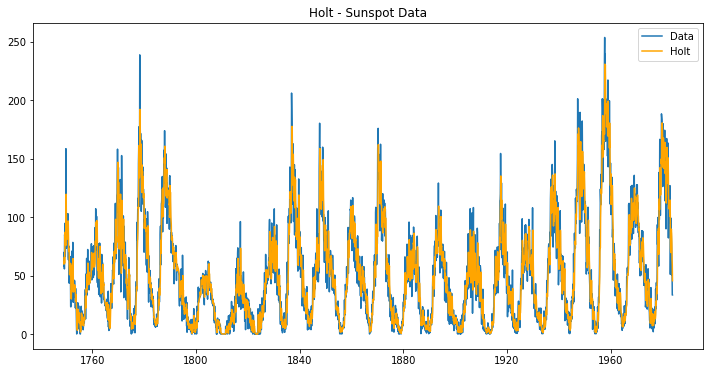

In [286]:
plt.plot(sunspotsDF, label='Data')
plt.plot(holtResults.fittedvalues, color='orange', label='Holt')
plt.legend()
plt.title('Holt - Sunspot Data');

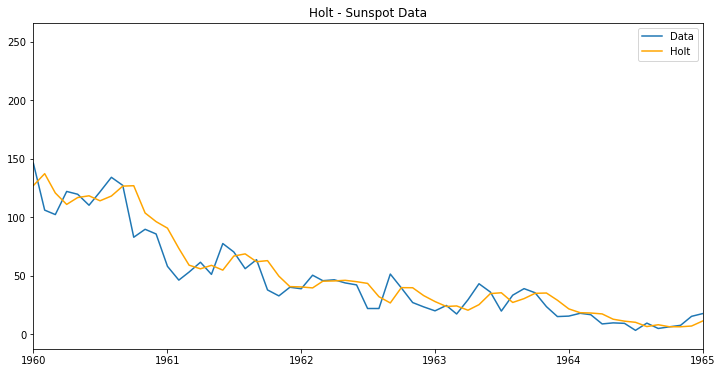

In [287]:
plt.plot(sunspotsDF, label='Data')
plt.plot(holtResults.fittedvalues, color='orange', label='Holt')
plt.xlim('1960-01-01','1965-01-01')
plt.legend()
plt.title('Holt - Sunspot Data');

# Holt-Winters
* Holt-Winters is triple Exponential Smoothing
* Builds on Holt & uses three smoothing equations
    * Level
    * Trend
    * Seasonality

\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} + s_{t+h-m(k+1)} \\
  \ell_{t} &= \alpha(y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1}\\
  s_{t} &= \gamma (y_{t}-\ell_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m},
\end{align*}

In [288]:
modelHW = ExponentialSmoothing(sunspotsDF, trend='additive').fit()

In [289]:
resultsDF.loc['HoltWinters'] = [modelHW.sse, modelHW.aic, modelHW.bic]
modelHW.summary()

Dep. Variable:,endog,No. Observations:,2820
Model:,ExponentialSmoothing,SSE,716119.661
Optimized:,True,AIC,15622.651
Trend:,Additive,BIC,15646.429
Seasonal:,None,AICC,15622.681
Seasonal Periods:,None,Date:,"Fri, 31 Jan 2020"
Box-Cox:,False,Time:,06:51:33
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5294191,alpha,True
smoothing_slope,0.000000,beta,True


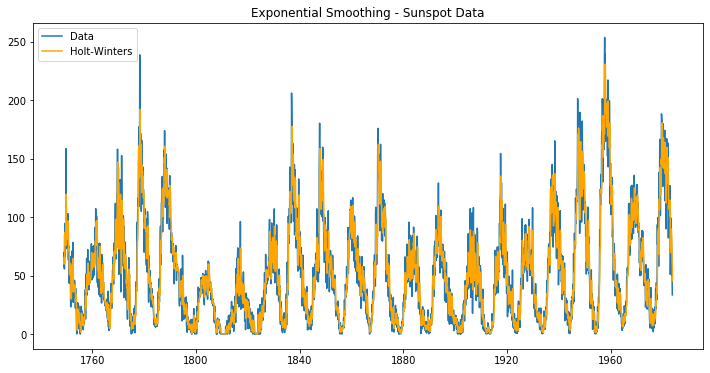

In [290]:
plt.plot(sunspotsDF, label='Data')
plt.plot(modelHW.fittedvalues, color='orange', label='Holt-Winters')
plt.legend()
plt.title('Exponential Smoothing - Sunspot Data');

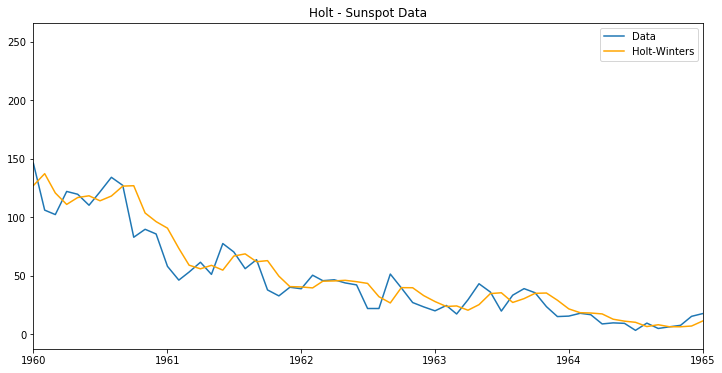

In [291]:
plt.plot(sunspotsDF, label='Data')
plt.plot(modelHW.fittedvalues, color='orange', label='Holt-Winters')
plt.xlim('1960-01-01','1965-01-01')
plt.legend()
plt.title('Holt - Sunspot Data');

# Comparison
* Simple Exponential Smoothing was best performer given AIC
* SSE for Simple Exp Smoothing and Holt Winters was same
* Holt Winters penalized for extra parameters (Parsimony wins)

In [292]:
resultsDF.sort_values('AIC', ascending=True)

,SSE,AIC,BIC
Simple:Auto,7.161197e+05,15618.651306,15630.540290
HoltWinters,7.161197e+05,15622.651306,15646.429275
Simple:Naive,8.331687e+05,16045.567974,16057.456959
Holt,8.331687e+05,16045.567974,16057.456959
Simple:EWMA,1.061997e+06,16729.897132,16741.786116
Simple:Average,5.449625e+06,21341.713648,21353.602632


# Dampening
* Intuition - Apple stock - is it reasonable for market cap to continue growing at a multiplicative rate?
* We can't expect trend to grow exponentially for ever
* Dampening is a model parameter
* Consider using for long range forecasting
* Dampening Range 0 .. 1
    * Dampening closer to 0.0 will reduce historical trend making the pattern more level
    * Dampening closer to 1.0 will follow historical trend

## Airline Passengers

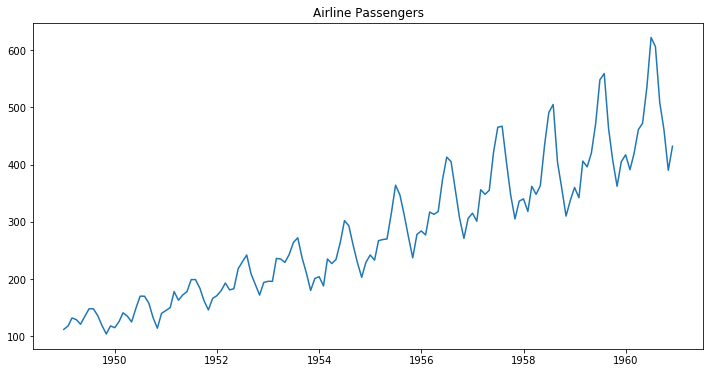

In [263]:
plt.figure(figsize=(12,6))
plt.plot(passengersDF)
plt.title('Airline Passengers');

## Holt-Winters Model
* Our trends indicate large growth (50% more at seasonal peak)

In [264]:
model = ExponentialSmoothing(passengersDF, trend='mul', seasonal='mul', seasonal_periods=12).fit()
forecasted = model.predict(len(passengersDF), len(passengersDF) + 120)

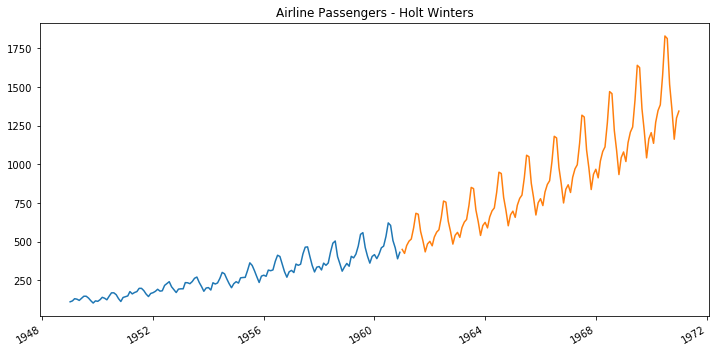

In [265]:
plt.plot(passengersDF)
plt.title('Airline Passengers - Holt Winters');
forecasted.plot()

## Dampened Model

In [266]:
damped = ExponentialSmoothing(passengersDF, damped=True, trend='mul', seasonal='mul', seasonal_periods=12).fit()
forecastedDamped = damped.predict(len(passengersDF), len(passengersDF) + 120)

/Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


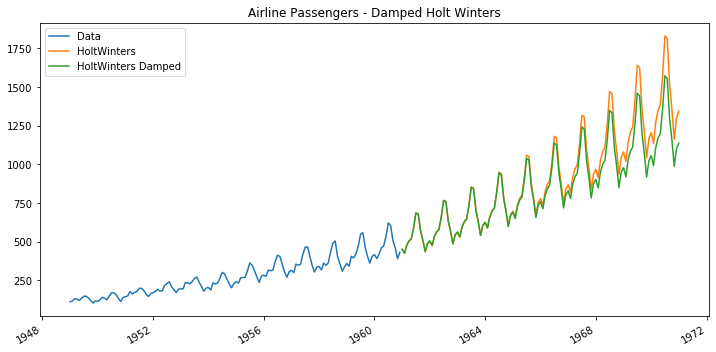

In [267]:
plt.plot(passengersDF, label='Data')
plt.title('Airline Passengers - Damped Holt Winters');
forecasted.plot(label='HoltWinters')
forecastedDamped.plot(label='HoltWinters Damped')
plt.legend()

# Conclusion
* Smoothing, Holt, Holt Winters etc. performs well on one step predictions
* Handle level, trend, seasonal, dampening for univariate time series
* Don't discount these technique in favor of machine learning & deep learning
* Read http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0194889
    * Authors evaluate performance on 1045 monthly times series using multiple approaches
    * Used Statistical methods including Exponential ETS, Holt and Simple Exponential Smoothing
    * Used Machine learning methods including LSTM
    * Report published March 27, 2018
* Some useful findings & suggestions:
    * Deseasonalize data before applying ML technique
    * Use sliding window training for ML

In [268]:
from IPython.core.display import display, HTML
display(HTML('<img src="https://journals.plos.org/plosone/article/figure/image?download&size=large&id=info:doi/10.1371/journal.pone.0194889.g002"/>'))